In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # importing libraries

In [2]:
r = requests.get('http://paulbarry.itcarlow.ie/weatherdata/weather_reports.csv')

In [3]:
with open('weather_reports.csv', "w", errors = 'ignore') as tocsvf:
    print(r.content.decode(), file=tocsvf)

In [4]:
weather_data = pd.read_csv('weather_reports.csv', sep='|')

### Data Manipulation

In [5]:
weather_data.head()

,Date,Time,Location,Wind Direction,Wind Speed (kts),Weather,Temp (C),Humidity (%),Rain (mm),Pressure (hPa)
0,6-DEC-2017,12:00,ATHENRY GALWAY(A),S,11 Gust 23,--,12,87,0.0,1013
1,6-DEC-2017,12:00,BALLYHAISE CAVAN(A),S,13,CLOUDY,11,89,0.0,1013
2,6-DEC-2017,12:00,BELMULLET(A),S,26 Gust 35,LIGHT RAIN,12,97,0.4,1009
3,6-DEC-2017,12:00,CASEMENT AERODROME,S,25 Gust 41,CLOUDY,11,83,0.0,1016
4,6-DEC-2017,12:00,CLAREMORRIS(A),S,12 Gust 26,--,10,97,0.6,1012


#### 2a) Converting the string-based Date column to a DateTime value.

In [6]:
weather_data['Date'] = weather_data['Date'].apply(pd.to_datetime)

In [7]:
weather_data.head()

,Date,Time,Location,Wind Direction,Wind Speed (kts),Weather,Temp (C),Humidity (%),Rain (mm),Pressure (hPa)
0,2017-12-06,12:00,ATHENRY GALWAY(A),S,11 Gust 23,--,12,87,0.0,1013
1,2017-12-06,12:00,BALLYHAISE CAVAN(A),S,13,CLOUDY,11,89,0.0,1013
2,2017-12-06,12:00,BELMULLET(A),S,26 Gust 35,LIGHT RAIN,12,97,0.4,1009
3,2017-12-06,12:00,CASEMENT AERODROME,S,25 Gust 41,CLOUDY,11,83,0.0,1016
4,2017-12-06,12:00,CLAREMORRIS(A),S,12 Gust 26,--,10,97,0.6,1012


#### 2b) Creating a MultiIndex by Date, then Time.

In [8]:
data=weather_data.set_index(['Date','Time'])
data.head()

Location Wind Direction Wind Speed (kts)  \
Date       Time                                                         
2017-12-06 12:00    ATHENRY GALWAY(A)              S       11 Gust 23   
           12:00  BALLYHAISE CAVAN(A)              S               13   
           12:00         BELMULLET(A)              S       26 Gust 35   
           12:00   CASEMENT AERODROME              S       25 Gust 41   
           12:00       CLAREMORRIS(A)              S       12 Gust 26   

                     Weather Temp (C) Humidity (%) Rain (mm) Pressure (hPa)  
Date       Time                                                              
2017-12-06 12:00          --       12           87       0.0           1013  
           12:00      CLOUDY       11           89       0.0           1013  
           12:00  LIGHT RAIN       12           97       0.4           1009  
           12:00      CLOUDY       11           83       0.0           1016  
           12:00          --       10           97       0.6           1012

#### i) Wind Direction Column.

For cleaning Wind Direction column, I have chosen backfilling function to replace '--' and 'n/a' entries. I think backfilling is reasonable because it is observed that most of the times the wind direction is the same for 3 consecutive rows(that is 3 consecutive locations) 

In [9]:
data['Wind Direction']=data['Wind Direction'].replace('--',method='bfill') #replacing '--'

In [10]:
data['Wind Direction']=data['Wind Direction'].replace('n/a',method='bfill') #replacing 'n/a'
data

Location Wind Direction Wind Speed (kts)  \
Date       Time                                                         
2017-12-06 12:00    ATHENRY GALWAY(A)              S       11 Gust 23   
           12:00  BALLYHAISE CAVAN(A)              S               13   
           12:00         BELMULLET(A)              S       26 Gust 35   
           12:00   CASEMENT AERODROME              S       25 Gust 41   
           12:00       CLAREMORRIS(A)              S       12 Gust 26   
           12:00         CORK AIRPORT              S       19 Gust 32   
           12:00       DUBLIN AIRPORT              S       18 Gust 30   
           12:00     DUNSANY MEATH(A)              S               17   
           12:00    FINNER DONEGAL(A)              S       23 Gust 36   
           12:00  GURTEEN TIPPERARY(A              S               19   
           12:00  JOHNSTOWN CASTLE(A)              S       17 Gust 27   
           12:00     KNOCK AIRPORT(P)              S       18 Gust 33   
           12:00  MACE HEAD GALWAY(A)              S               24   
           12:00        MALIN HEAD(A)              S       24 Gust 35   
           12:00     MARKREE SLIGO(A)              S               --   
           12:00    MOOREPARK CORK(A)              S       07 Gust 22   
           12:00  MT DILLON ROSCOM(A)              S       11 Gust 22   
           12:00         MULLINGAR(A)              S               12   
           12:00      NEWPORT MAYO(A)              S               12   
           12:00   OAK PARK CARLOW(A)              S       18 Gust 28   
           12:00      PHOENIX PARK(A)              S               --   
           12:00      ROCHES POINT(A)              S       25 Gust 34   
           12:00      SHANNON AIRPORT              S               18   
           12:00    SHERKIN ISLAND(A)              S               26   
           12:00          VALENTIA(A)              S       19 Gust 33   
           13:00    ATHENRY GALWAY(A)              S               12   
           13:00  BALLYHAISE CAVAN(A)              S               13   
           13:00         BELMULLET(A)              S       28 Gust 36   
           13:00   CASEMENT AERODROME             SW       23 Gust 43   
           13:00       CLAREMORRIS(A)              S               12   
...                               ...            ...              ...   
2018-01-10 09:00      PHOENIX PARK(A)             SE               --   
           09:00      ROCHES POINT(A)             SE               11   
           09:00      SHANNON AIRPORT             NW               03   
           09:00    SHERKIN ISLAND(A)             SE               14   
           09:00          VALENTIA(A)             SE               07   
           10:00    ATHENRY GALWAY(A)              E               06   
           10:00  BALLYHAISE CAVAN(A)             SE               01   
           10:00         BELMULLET(A)              E               02   
           10:00   CASEMENT AERODROME              E               05   
           10:00       CLAREMORRIS(A)              E               04   
           10:00         CORK AIRPORT             SE               08   
           10:00       DUBLIN AIRPORT              E               03   
           10:00     DUNSANY MEATH(A)              S               02   
           10:00    FINNER DONEGAL(A)              E               06   
           10:00  GURTEEN TIPPERARY(A             SE               05   
           10:00  JOHNSTOWN CASTLE(A)              E               02   
           10:00     KNOCK AIRPORT(P)             SE               06   
           10:00  MACE HEAD GALWAY(A)              E               09   
           10:00        MALIN HEAD(A)              S               08   
           10:00     MARKREE SLIGO(A)              E               --   
           10:00    MOOREPARK CORK(A)              E               06   
           10:00  MT DILLON ROSCOM(A)              N               02   
           10:

#### ii) Wind Speed (kts) Column

I have used the regular expression method to get rid of 'Gust' character.If any character '[A-Za-z]' is found in wind speed cloumn then it will be replaced with a blank space using replace function. 

In [11]:
data1=data.replace({'Wind Speed (kts)': '[A-Za-z]'},'',regex=True)
data1.head()

Location Wind Direction Wind Speed (kts)  \
Date       Time                                                         
2017-12-06 12:00    ATHENRY GALWAY(A)              S           11  23   
           12:00  BALLYHAISE CAVAN(A)              S               13   
           12:00         BELMULLET(A)              S           26  35   
           12:00   CASEMENT AERODROME              S           25  41   
           12:00       CLAREMORRIS(A)              S           12  26   

                     Weather Temp (C) Humidity (%) Rain (mm) Pressure (hPa)  
Date       Time                                                              
2017-12-06 12:00          --       12           87       0.0           1013  
           12:00      CLOUDY       11           89       0.0           1013  
           12:00  LIGHT RAIN       12           97       0.4           1009  
           12:00      CLOUDY       11           83       0.0           1016  
           12:00          --       10           97       0.6           1012

Since last 2 digits are largest in all the cases, I choose to retain only last 2 digits.

In [12]:
data1['Wind Speed (kts)']=data1['Wind Speed (kts)'].str[-2:]
data1

Location Wind Direction Wind Speed (kts)  \
Date       Time                                                         
2017-12-06 12:00    ATHENRY GALWAY(A)              S               23   
           12:00  BALLYHAISE CAVAN(A)              S               13   
           12:00         BELMULLET(A)              S               35   
           12:00   CASEMENT AERODROME              S               41   
           12:00       CLAREMORRIS(A)              S               26   
           12:00         CORK AIRPORT              S               32   
           12:00       DUBLIN AIRPORT              S               30   
           12:00     DUNSANY MEATH(A)              S               17   
           12:00    FINNER DONEGAL(A)              S               36   
           12:00  GURTEEN TIPPERARY(A              S               19   
           12:00  JOHNSTOWN CASTLE(A)              S               27   
           12:00     KNOCK AIRPORT(P)              S               33   
           12:00  MACE HEAD GALWAY(A)              S               24   
           12:00        MALIN HEAD(A)              S               35   
           12:00     MARKREE SLIGO(A)              S               --   
           12:00    MOOREPARK CORK(A)              S               22   
           12:00  MT DILLON ROSCOM(A)              S               22   
           12:00         MULLINGAR(A)              S               12   
           12:00      NEWPORT MAYO(A)              S               12   
           12:00   OAK PARK CARLOW(A)              S               28   
           12:00      PHOENIX PARK(A)              S               --   
           12:00      ROCHES POINT(A)              S               34   
           12:00      SHANNON AIRPORT              S               18   
           12:00    SHERKIN ISLAND(A)              S               26   
           12:00          VALENTIA(A)              S               33   
           13:00    ATHENRY GALWAY(A)              S               12   
           13:00  BALLYHAISE CAVAN(A)              S               13   
           13:00         BELMULLET(A)              S               36   
           13:00   CASEMENT AERODROME             SW               43   
           13:00       CLAREMORRIS(A)              S               12   
...                               ...            ...              ...   
2018-01-10 09:00      PHOENIX PARK(A)             SE               --   
           09:00      ROCHES POINT(A)             SE               11   
           09:00      SHANNON AIRPORT             NW               03   
           09:00    SHERKIN ISLAND(A)             SE               14   
           09:00          VALENTIA(A)             SE               07   
           10:00    ATHENRY GALWAY(A)              E               06   
           10:00  BALLYHAISE CAVAN(A)             SE               01   
           10:00         BELMULLET(A)              E               02   
           10:00   CASEMENT AERODROME              E               05   
           10:00       CLAREMORRIS(A)              E               04   
           10:00         CORK AIRPORT             SE               08   
           10:00       DUBLIN AIRPORT              E               03   
           10:00     DUNSANY MEATH(A)              S               02   
           10:00    FINNER DONEGAL(A)              E               06   
           10:00  GURTEEN TIPPERARY(A             SE               05   
           10:00  JOHNSTOWN CASTLE(A)              E               02   
           10:00     KNOCK AIRPORT(P)             SE               06   
           10:00  MACE HEAD GALWAY(A)              E               09   
           10:00        MALIN HEAD(A)              S               08   
           10:00     MARKREE SLIGO(A)              E               --   
           10:00    MOOREPARK CORK(A)              E               06   
           10:00  MT DILLON ROSCOM(A)              N               02   
           10:

Below I am converting the Wind speed column into a numeric one so find the suitable stretegy to replace the blank and null values.

In [13]:
data1['Wind Speed (kts)']=pd.to_numeric(data1['Wind Speed (kts)'], errors='coerse')

Below with the use of value_counts function it is observed that 1 is the most frequent value for the Wind speed. With the use of describe function it is also evident that 1 is the min value. I am replacing the '--' and 'n/a' entries with the min value using fillna function.    

In [14]:
data1['Wind Speed (kts)'].value_counts()

6.0     1375
7.0     1287
8.0     1254
5.0     1249
4.0     1171
9.0     1054
3.0      988
10.0     898
11.0     718
2.0      660
12.0     645
13.0     520
14.0     435
15.0     374
1.0      331
23.0     317
26.0     291
24.0     291
22.0     285
21.0     280
16.0     275
27.0     270
29.0     250
25.0     246
28.0     245
34.0     241
30.0     240
31.0     234
17.0     229
32.0     224
        ... 
41.0     108
39.0     102
42.0      77
43.0      67
45.0      65
47.0      56
44.0      55
48.0      51
46.0      45
52.0      29
51.0      26
50.0      26
49.0      18
54.0      16
55.0      14
53.0      13
58.0      11
57.0       6
60.0       4
56.0       4
62.0       3
63.0       3
75.0       3
65.0       2
59.0       2
64.0       2
61.0       2
68.0       1
84.0       1
67.0       1
Name: Wind Speed (kts), Length: 69, dtype: int64

In [15]:
data1['Wind Speed (kts)'].describe()

count    19187.000000
mean        14.455360
std         11.818568
min          1.000000
25%          6.000000
50%         10.000000
75%         22.000000
max         84.000000
Name: Wind Speed (kts), dtype: float64

In [16]:
data1.fillna(data1['Wind Speed (kts)'].min(),inplace=True)
data1

Location Wind Direction  Wind Speed (kts)  \
Date       Time                                                          
2017-12-06 12:00    ATHENRY GALWAY(A)              S              23.0   
           12:00  BALLYHAISE CAVAN(A)              S              13.0   
           12:00         BELMULLET(A)              S              35.0   
           12:00   CASEMENT AERODROME              S              41.0   
           12:00       CLAREMORRIS(A)              S              26.0   
           12:00         CORK AIRPORT              S              32.0   
           12:00       DUBLIN AIRPORT              S              30.0   
           12:00     DUNSANY MEATH(A)              S              17.0   
           12:00    FINNER DONEGAL(A)              S              36.0   
           12:00  GURTEEN TIPPERARY(A              S              19.0   
           12:00  JOHNSTOWN CASTLE(A)              S              27.0   
           12:00     KNOCK AIRPORT(P)              S              33.0   
           12:00  MACE HEAD GALWAY(A)              S              24.0   
           12:00        MALIN HEAD(A)              S              35.0   
           12:00     MARKREE SLIGO(A)              S               1.0   
           12:00    MOOREPARK CORK(A)              S              22.0   
           12:00  MT DILLON ROSCOM(A)              S              22.0   
           12:00         MULLINGAR(A)              S              12.0   
           12:00      NEWPORT MAYO(A)              S              12.0   
           12:00   OAK PARK CARLOW(A)              S              28.0   
           12:00      PHOENIX PARK(A)              S               1.0   
           12:00      ROCHES POINT(A)              S              34.0   
           12:00      SHANNON AIRPORT              S              18.0   
           12:00    SHERKIN ISLAND(A)              S              26.0   
           12:00          VALENTIA(A)              S              33.0   
           13:00    ATHENRY GALWAY(A)              S              12.0   
           13:00  BALLYHAISE CAVAN(A)              S              13.0   
           13:00         BELMULLET(A)              S              36.0   
           13:00   CASEMENT AERODROME             SW              43.0   
           13:00       CLAREMORRIS(A)              S              12.0   
...                               ...            ...               ...   
2018-01-10 09:00      PHOENIX PARK(A)             SE               1.0   
           09:00      ROCHES POINT(A)             SE              11.0   
           09:00      SHANNON AIRPORT             NW               3.0   
           09:00    SHERKIN ISLAND(A)             SE              14.0   
           09:00          VALENTIA(A)             SE               7.0   
           10:00    ATHENRY GALWAY(A)              E               6.0   
           10:00  BALLYHAISE CAVAN(A)             SE               1.0   
           10:00         BELMULLET(A)              E               2.0   
           10:00   CASEMENT AERODROME              E               5.0   
           10:00       CLAREMORRIS(A)              E               4.0   
           10:00         CORK AIRPORT             SE               8.0   
           10:00       DUBLIN AIRPORT              E               3.0   
           10:00     DUNSANY MEATH(A)              S               2.0   
           10:00    FINNER DONEGAL(A)              E               6.0   
           10:00  GURTEEN TIPPERARY(A             SE               5.0   
           10:00  JOHNSTOWN CASTLE(A)              E               2.0   
           10:00     KNOCK AIRPORT(P)             SE               6.0   
           10:00  MACE HEAD GALWAY(A)              E               9.0   
           10:00        MALIN HEAD(A)              S               8.0   
           10:00     MARKREE SLIGO(A)              E               1.0   
           10:00    MOOREPARK CORK(A)              E               6.0   
           10:00  MT DILLON ROSCO

In [17]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 20975 entries, (2017-12-06 00:00:00, 12:00) to (2018-01-10 00:00:00, 10:00)
Data columns (total 8 columns):
Location            20975 non-null object
Wind Direction      20975 non-null object
Wind Speed (kts)    20975 non-null float64
Weather             20975 non-null object
Temp (C)            20975 non-null object
Humidity (%)        20975 non-null object
Rain (mm)           20975 non-null object
Pressure (hPa)      20975 non-null object
dtypes: float64(1), object(7)
memory usage: 1.3+ MB


Converting wind column to interger as it was earlier changed to float value.

In [18]:
data1['Wind Speed (kts)']=data1['Wind Speed (kts)'].astype(int)

In [19]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 20975 entries, (2017-12-06 00:00:00, 12:00) to (2018-01-10 00:00:00, 10:00)
Data columns (total 8 columns):
Location            20975 non-null object
Wind Direction      20975 non-null object
Wind Speed (kts)    20975 non-null int32
Weather             20975 non-null object
Temp (C)            20975 non-null object
Humidity (%)        20975 non-null object
Rain (mm)           20975 non-null object
Pressure (hPa)      20975 non-null object
dtypes: int32(1), object(7)
memory usage: 1.2+ MB


#### iii) Weather column 

For cleaning weather data I am replacing the null values and '--' values with 'Fair' weather since fair weather is most frequent weather condition.From the below table it is evident that FAIR weather condition is most frequent.

In [20]:
data1['Weather'].value_counts()

--                 6687
FAIR               3402
CLOUDY             3129
RAIN SHOWER        1297
MIST               1150
LIGHT RAIN          810
RECENT RAIN         743
FINE                584
- n/a -             533
RECENT DRIZZLE      510
LIGHT DRIZZLE       305
RECENT SHOWER       293
MOD. DRIZZLE        219
MODERATE RAIN       200
FOG THICKENING      171
RECENT FOG          154
FOG                 154
MOD RAIN SHOWER      87
RAIN/DRIZZLE         84
RECENT SNOW          70
FOG THINNING         70
SHOWERY PRECIP       54
SNOW SHOWER          37
RECENT PRECIP        35
LIGHT SNOW           33
LIGHT SLEET          29
FOG PATCHES          25
HEAVY DRIZZLE        20
PRECIPITATION        17
NEARBY SHOWER        16
RECENT HAIL          11
HEAVY RAIN            7
SLEET SHOWER          6
FOG NEARBY            6
MOD/HEAVY SLEET       5
HVY RAIN SHOWER       5
HAIL SHOWER           3
ICE PELLETS           3
RECENT THUNDER        2
FREEZING RAIN         2
MOD SNOW SHOWER       2
MODERATE SNOW   

In [21]:
data1['Weather']=data1['Weather'].replace('--','FAIR')

In [22]:
data1['Weather']=data1['Weather'].replace('- n/a -','FAIR')

In [23]:
data1['Weather']=data1['Weather'].replace('n/a','FAIR')
data1.head()

Location Wind Direction  Wind Speed (kts)  \
Date       Time                                                          
2017-12-06 12:00    ATHENRY GALWAY(A)              S                23   
           12:00  BALLYHAISE CAVAN(A)              S                13   
           12:00         BELMULLET(A)              S                35   
           12:00   CASEMENT AERODROME              S                41   
           12:00       CLAREMORRIS(A)              S                26   

                     Weather Temp (C) Humidity (%) Rain (mm) Pressure (hPa)  
Date       Time                                                              
2017-12-06 12:00        FAIR       12           87       0.0           1013  
           12:00      CLOUDY       11           89       0.0           1013  
           12:00  LIGHT RAIN       12           97       0.4           1009  
           12:00      CLOUDY       11           83       0.0           1016  
           12:00        FAIR       10           97       0.6           1012

#### iv) Temperature Column

For cleaning Temperature column I am replacing the null values with mean of the all the temperature values for the consistency using fillna function. 

In [24]:
data1['Temp (C)']=pd.to_numeric(data1['Temp (C)'], errors='coerse')

In [25]:
data1['Temp (C)'].describe()

count    20906.000000
mean         5.699847
std          3.695240
min         -6.000000
25%          3.000000
50%          6.000000
75%          9.000000
max         14.000000
Name: Temp (C), dtype: float64

In [26]:
data1.fillna(data1['Temp (C)'].mean(),inplace=True)
data1

Location Wind Direction  Wind Speed (kts)  \
Date       Time                                                          
2017-12-06 12:00    ATHENRY GALWAY(A)              S                23   
           12:00  BALLYHAISE CAVAN(A)              S                13   
           12:00         BELMULLET(A)              S                35   
           12:00   CASEMENT AERODROME              S                41   
           12:00       CLAREMORRIS(A)              S                26   
           12:00         CORK AIRPORT              S                32   
           12:00       DUBLIN AIRPORT              S                30   
           12:00     DUNSANY MEATH(A)              S                17   
           12:00    FINNER DONEGAL(A)              S                36   
           12:00  GURTEEN TIPPERARY(A              S                19   
           12:00  JOHNSTOWN CASTLE(A)              S                27   
           12:00     KNOCK AIRPORT(P)              S                33   
           12:00  MACE HEAD GALWAY(A)              S                24   
           12:00        MALIN HEAD(A)              S                35   
           12:00     MARKREE SLIGO(A)              S                 1   
           12:00    MOOREPARK CORK(A)              S                22   
           12:00  MT DILLON ROSCOM(A)              S                22   
           12:00         MULLINGAR(A)              S                12   
           12:00      NEWPORT MAYO(A)              S                12   
           12:00   OAK PARK CARLOW(A)              S                28   
           12:00      PHOENIX PARK(A)              S                 1   
           12:00      ROCHES POINT(A)              S                34   
           12:00      SHANNON AIRPORT              S                18   
           12:00    SHERKIN ISLAND(A)              S                26   
           12:00          VALENTIA(A)              S                33   
           13:00    ATHENRY GALWAY(A)              S                12   
           13:00  BALLYHAISE CAVAN(A)              S                13   
           13:00         BELMULLET(A)              S                36   
           13:00   CASEMENT AERODROME             SW                43   
           13:00       CLAREMORRIS(A)              S                12   
...                               ...            ...               ...   
2018-01-10 09:00      PHOENIX PARK(A)             SE                 1   
           09:00      ROCHES POINT(A)             SE                11   
           09:00      SHANNON AIRPORT             NW                 3   
           09:00    SHERKIN ISLAND(A)             SE                14   
           09:00          VALENTIA(A)             SE                 7   
           10:00    ATHENRY GALWAY(A)              E                 6   
           10:00  BALLYHAISE CAVAN(A)             SE                 1   
           10:00         BELMULLET(A)              E                 2   
           10:00   CASEMENT AERODROME              E                 5   
           10:00       CLAREMORRIS(A)              E                 4   
           10:00         CORK AIRPORT             SE                 8   
           10:00       DUBLIN AIRPORT              E                 3   
           10:00     DUNSANY MEATH(A)              S                 2   
           10:00    FINNER DONEGAL(A)              E                 6   
           10:00  GURTEEN TIPPERARY(A             SE                 5   
           10:00  JOHNSTOWN CASTLE(A)              E                 2   
           10:00     KNOCK AIRPORT(P)             SE                 6   
           10:00  MACE HEAD GALWAY(A)              E                 9   
           10:00        MALIN HEAD(A)              S                 8   
           10:00     MARKREE SLIGO(A)              E                 1   
           10:00    MOOREPARK CORK(A)              E                 6   
           10:00  MT DILLON ROSCO

In [27]:
data1['Temp (C)']=data1['Temp (C)'].astype(int)

In [28]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 20975 entries, (2017-12-06 00:00:00, 12:00) to (2018-01-10 00:00:00, 10:00)
Data columns (total 8 columns):
Location            20975 non-null object
Wind Direction      20975 non-null object
Wind Speed (kts)    20975 non-null int32
Weather             20975 non-null object
Temp (C)            20975 non-null int32
Humidity (%)        20975 non-null object
Rain (mm)           20975 non-null object
Pressure (hPa)      20975 non-null object
dtypes: int32(2), object(6)
memory usage: 1.2+ MB


In [29]:
data1['Temp (C)'].value_counts(dropna=False)

 5     2270
 6     2026
 4     1911
 7     1784
 11    1682
 3     1681
 2     1612
 8     1449
 10    1382
 9     1379
 1     1263
 12     754
 0      733
-1      372
-2      210
 13     186
-3      123
-4       81
-5       34
 14      23
-6       20
Name: Temp (C), dtype: int64

#### v)Humidity Column

For cleaning Humidity column I am replacing the null values with minimum of the all the Humidity values using fillna function, because mean is very close to maximum value.

In [30]:
data1['Humidity (%)']=pd.to_numeric(data1['Humidity (%)'], errors='coerse')

In [31]:
data1['Humidity (%)'].describe()

count    20888.000000
mean        87.476733
std          9.020515
min         45.000000
25%         82.000000
50%         89.000000
75%         95.000000
max        100.000000
Name: Humidity (%), dtype: float64

In [32]:
data1.fillna(data1['Humidity (%)'].min(),inplace=True)
data1

Location Wind Direction  Wind Speed (kts)  \
Date       Time                                                          
2017-12-06 12:00    ATHENRY GALWAY(A)              S                23   
           12:00  BALLYHAISE CAVAN(A)              S                13   
           12:00         BELMULLET(A)              S                35   
           12:00   CASEMENT AERODROME              S                41   
           12:00       CLAREMORRIS(A)              S                26   
           12:00         CORK AIRPORT              S                32   
           12:00       DUBLIN AIRPORT              S                30   
           12:00     DUNSANY MEATH(A)              S                17   
           12:00    FINNER DONEGAL(A)              S                36   
           12:00  GURTEEN TIPPERARY(A              S                19   
           12:00  JOHNSTOWN CASTLE(A)              S                27   
           12:00     KNOCK AIRPORT(P)              S                33   
           12:00  MACE HEAD GALWAY(A)              S                24   
           12:00        MALIN HEAD(A)              S                35   
           12:00     MARKREE SLIGO(A)              S                 1   
           12:00    MOOREPARK CORK(A)              S                22   
           12:00  MT DILLON ROSCOM(A)              S                22   
           12:00         MULLINGAR(A)              S                12   
           12:00      NEWPORT MAYO(A)              S                12   
           12:00   OAK PARK CARLOW(A)              S                28   
           12:00      PHOENIX PARK(A)              S                 1   
           12:00      ROCHES POINT(A)              S                34   
           12:00      SHANNON AIRPORT              S                18   
           12:00    SHERKIN ISLAND(A)              S                26   
           12:00          VALENTIA(A)              S                33   
           13:00    ATHENRY GALWAY(A)              S                12   
           13:00  BALLYHAISE CAVAN(A)              S                13   
           13:00         BELMULLET(A)              S                36   
           13:00   CASEMENT AERODROME             SW                43   
           13:00       CLAREMORRIS(A)              S                12   
...                               ...            ...               ...   
2018-01-10 09:00      PHOENIX PARK(A)             SE                 1   
           09:00      ROCHES POINT(A)             SE                11   
           09:00      SHANNON AIRPORT             NW                 3   
           09:00    SHERKIN ISLAND(A)             SE                14   
           09:00          VALENTIA(A)             SE                 7   
           10:00    ATHENRY GALWAY(A)              E                 6   
           10:00  BALLYHAISE CAVAN(A)             SE                 1   
           10:00         BELMULLET(A)              E                 2   
           10:00   CASEMENT AERODROME              E                 5   
           10:00       CLAREMORRIS(A)              E                 4   
           10:00         CORK AIRPORT             SE                 8   
           10:00       DUBLIN AIRPORT              E                 3   
           10:00     DUNSANY MEATH(A)              S                 2   
           10:00    FINNER DONEGAL(A)              E                 6   
           10:00  GURTEEN TIPPERARY(A             SE                 5   
           10:00  JOHNSTOWN CASTLE(A)              E                 2   
           10:00     KNOCK AIRPORT(P)             SE                 6   
           10:00  MACE HEAD GALWAY(A)              E                 9   
           10:00        MALIN HEAD(A)              S                 8   
           10:00     MARKREE SLIGO(A)              E                 1   
           10:00    MOOREPARK CORK(A)              E                 6   
           10:00  MT DILLON ROSCO

In [33]:
data1['Humidity (%)']=data1['Humidity (%)'].astype(int)

In [34]:
data1['Humidity (%)'].value_counts(dropna=False)

97     1323
95     1126
99     1083
94     1018
96      958
92      934
90      925
91      920
89      915
93      909
98      787
86      760
87      743
88      706
85      645
82      625
84      595
83      582
81      530
80      476
79      440
78      432
77      398
76      343
75      321
74      315
100     291
73      253
72      223
71      206
70      175
69      159
68      137
67      129
45       88
66       88
65       73
64       71
63       62
61       52
62       39
60       36
59       27
57       18
58       10
55        8
56        6
54        5
52        4
49        2
51        2
50        1
53        1
Name: Humidity (%), dtype: int64

In [35]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 20975 entries, (2017-12-06 00:00:00, 12:00) to (2018-01-10 00:00:00, 10:00)
Data columns (total 8 columns):
Location            20975 non-null object
Wind Direction      20975 non-null object
Wind Speed (kts)    20975 non-null int32
Weather             20975 non-null object
Temp (C)            20975 non-null int32
Humidity (%)        20975 non-null int32
Rain (mm)           20975 non-null object
Pressure (hPa)      20975 non-null object
dtypes: int32(3), object(5)
memory usage: 1.1+ MB


#### vi) Rain Column

Since there are no 'n/a' values in Rain column, I am just replacing 'Trace' with '0.0'

In [36]:
data1['Rain (mm)'].value_counts(dropna=False)

0.0      12639
Trace     2209
0.1       1748
0.2        882
0.3        491
0.4        450
0.5        303
0.6        268
0.8        252
0.7        216
1.0        159
0.9        154
1.1        125
1.2        113
1.3        110
1.4         89
1.5         74
1.6         63
1.7         59
1.8         51
n/a         46
2.0         46
1.9         45
2.2         44
2.1         37
2.3         29
2.5         24
2.4         24
2.6         20
3.0         16
         ...  
3.7          9
4.2          8
3.4          7
3.8          7
4.4          6
4.3          5
3.9          5
4.6          4
4.8          4
4.5          4
4.1          4
4.9          3
5.2          3
4.7          3
4.0          3
5.7          2
5.4          1
7.9          1
5.6          1
7.1          1
7.8          1
7.0          1
5.8          1
66.6         1
5.0          1
6.9          1
6.3          1
6.8          1
6.0          1
8.0          1
Name: Rain (mm), Length: 68, dtype: int64

In [77]:
data1['Rain (mm)']=data1['Rain (mm)'].replace(['n/a','Trace'],'0.0')
data1

Location Wind Direction  Wind Speed (kts)  \
Date       Time                                                          
2017-12-06 12:00    ATHENRY GALWAY(A)              S                23   
           12:00  BALLYHAISE CAVAN(A)              S                13   
           12:00         BELMULLET(A)              S                35   
           12:00   CASEMENT AERODROME              S                41   
           12:00       CLAREMORRIS(A)              S                26   
           12:00         CORK AIRPORT              S                32   
           12:00       DUBLIN AIRPORT              S                30   
           12:00     DUNSANY MEATH(A)              S                17   
           12:00    FINNER DONEGAL(A)              S                36   
           12:00  GURTEEN TIPPERARY(A              S                19   
           12:00  JOHNSTOWN CASTLE(A)              S                27   
           12:00     KNOCK AIRPORT(P)              S                33   
           12:00  MACE HEAD GALWAY(A)              S                24   
           12:00        MALIN HEAD(A)              S                35   
           12:00     MARKREE SLIGO(A)              S                 1   
           12:00    MOOREPARK CORK(A)              S                22   
           12:00  MT DILLON ROSCOM(A)              S                22   
           12:00         MULLINGAR(A)              S                12   
           12:00      NEWPORT MAYO(A)              S                12   
           12:00   OAK PARK CARLOW(A)              S                28   
           12:00      PHOENIX PARK(A)              S                 1   
           12:00      ROCHES POINT(A)              S                34   
           12:00      SHANNON AIRPORT              S                18   
           12:00    SHERKIN ISLAND(A)              S                26   
           12:00          VALENTIA(A)              S                33   
           13:00    ATHENRY GALWAY(A)              S                12   
           13:00  BALLYHAISE CAVAN(A)              S                13   
           13:00         BELMULLET(A)              S                36   
           13:00   CASEMENT AERODROME             SW                43   
           13:00       CLAREMORRIS(A)              S                12   
...                               ...            ...               ...   
2018-01-10 09:00      PHOENIX PARK(A)             SE                 1   
           09:00      ROCHES POINT(A)             SE                11   
           09:00      SHANNON AIRPORT             NW                 3   
           09:00    SHERKIN ISLAND(A)             SE                14   
           09:00          VALENTIA(A)             SE                 7   
           10:00    ATHENRY GALWAY(A)              E                 6   
           10:00  BALLYHAISE CAVAN(A)             SE                 1   
           10:00         BELMULLET(A)              E                 2   
           10:00   CASEMENT AERODROME              E                 5   
           10:00       CLAREMORRIS(A)              E                 4   
           10:00         CORK AIRPORT             SE                 8   
           10:00       DUBLIN AIRPORT              E                 3   
           10:00     DUNSANY MEATH(A)              S                 2   
           10:00    FINNER DONEGAL(A)              E                 6   
           10:00  GURTEEN TIPPERARY(A             SE                 5   
           10:00  JOHNSTOWN CASTLE(A)              E                 2   
           10:00     KNOCK AIRPORT(P)             SE                 6   
           10:00  MACE HEAD GALWAY(A)              E                 9   
           10:00        MALIN HEAD(A)              S                 8   
           10:00     MARKREE SLIGO(A)              E                 1   
           10:00    MOOREPARK CORK(A)              E                 6   
           10:00  MT DILLON ROSCO

In [40]:
data1['Rain (mm)'].value_counts(dropna=False)

0.0     14894
0.1      1748
0.2       882
0.3       491
0.4       450
0.5       303
0.6       268
0.8       252
0.7       216
1.0       159
0.9       154
1.1       125
1.2       113
1.3       110
1.4        89
1.5        74
1.6        63
1.7        59
1.8        51
2.0        46
1.9        45
2.2        44
2.1        37
2.3        29
2.4        24
2.5        24
2.6        20
3.0        16
2.8        15
3.1        15
        ...  
3.7         9
4.2         8
3.8         7
3.4         7
4.4         6
3.9         5
4.3         5
4.8         4
4.6         4
4.1         4
4.5         4
5.2         3
4.0         3
4.9         3
4.7         3
5.7         2
7.1         1
7.8         1
5.0         1
7.0         1
66.6        1
5.4         1
6.0         1
8.0         1
5.6         1
6.8         1
5.8         1
6.3         1
6.9         1
7.9         1
Name: Rain (mm), Length: 66, dtype: int64

In [41]:
data1['Rain (mm)']=data1['Rain (mm)'].astype(float)

In [42]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 20975 entries, (2017-12-06 00:00:00, 12:00) to (2018-01-10 00:00:00, 10:00)
Data columns (total 8 columns):
Location            20975 non-null object
Wind Direction      20975 non-null object
Wind Speed (kts)    20975 non-null int32
Weather             20975 non-null object
Temp (C)            20975 non-null int32
Humidity (%)        20975 non-null int32
Rain (mm)           20975 non-null float64
Pressure (hPa)      20975 non-null object
dtypes: float64(1), int32(3), object(4)
memory usage: 1.1+ MB


#### vii) Pressure Column

For cleaning Pressure column I am replacing the null values with mean of the all the Pressure values for the consistency using fillna function.

In [43]:
data1['Pressure (hPa)'].value_counts(dropna=False)

991     665
1004    599
992     596
994     590
990     569
993     569
1003    557
995     532
1031    527
1001    515
1032    498
989     489
996     489
997     482
1002    471
1000    461
1033    446
1005    446
1030    439
998     436
1029    416
1022    399
999     398
1034    383
987     373
1021    371
1028    365
1023    363
988     361
1006    358
       ... 
1008    252
1016    229
1017    227
1009    213
983     201
1036    200
1015    198
1011    193
1014    186
1010    180
1013    176
1012    175
982     137
1037    129
981     113
1038     70
980      63
n/a      43
979      41
978      30
0        27
1039     19
977      14
976      11
974       6
975       5
972       4
971       2
970       1
973       1
Name: Pressure (hPa), Length: 72, dtype: int64

In [44]:
data1['Pressure (hPa)']=pd.to_numeric(data1['Pressure (hPa)'], errors='coerse')

In [45]:
data1['Pressure (hPa)'].describe()

count    20932.000000
mean      1006.533776
std         39.672865
min          0.000000
25%        994.000000
50%       1004.000000
75%       1023.000000
max       1039.000000
Name: Pressure (hPa), dtype: float64

In [46]:
data1.fillna(data1['Pressure (hPa)'].mean(),inplace=True)
data1

Location Wind Direction  Wind Speed (kts)  \
Date       Time                                                          
2017-12-06 12:00    ATHENRY GALWAY(A)              S                23   
           12:00  BALLYHAISE CAVAN(A)              S                13   
           12:00         BELMULLET(A)              S                35   
           12:00   CASEMENT AERODROME              S                41   
           12:00       CLAREMORRIS(A)              S                26   
           12:00         CORK AIRPORT              S                32   
           12:00       DUBLIN AIRPORT              S                30   
           12:00     DUNSANY MEATH(A)              S                17   
           12:00    FINNER DONEGAL(A)              S                36   
           12:00  GURTEEN TIPPERARY(A              S                19   
           12:00  JOHNSTOWN CASTLE(A)              S                27   
           12:00     KNOCK AIRPORT(P)              S                33   
           12:00  MACE HEAD GALWAY(A)              S                24   
           12:00        MALIN HEAD(A)              S                35   
           12:00     MARKREE SLIGO(A)              S                 1   
           12:00    MOOREPARK CORK(A)              S                22   
           12:00  MT DILLON ROSCOM(A)              S                22   
           12:00         MULLINGAR(A)              S                12   
           12:00      NEWPORT MAYO(A)              S                12   
           12:00   OAK PARK CARLOW(A)              S                28   
           12:00      PHOENIX PARK(A)              S                 1   
           12:00      ROCHES POINT(A)              S                34   
           12:00      SHANNON AIRPORT              S                18   
           12:00    SHERKIN ISLAND(A)              S                26   
           12:00          VALENTIA(A)              S                33   
           13:00    ATHENRY GALWAY(A)              S                12   
           13:00  BALLYHAISE CAVAN(A)              S                13   
           13:00         BELMULLET(A)              S                36   
           13:00   CASEMENT AERODROME             SW                43   
           13:00       CLAREMORRIS(A)              S                12   
...                               ...            ...               ...   
2018-01-10 09:00      PHOENIX PARK(A)             SE                 1   
           09:00      ROCHES POINT(A)             SE                11   
           09:00      SHANNON AIRPORT             NW                 3   
           09:00    SHERKIN ISLAND(A)             SE                14   
           09:00          VALENTIA(A)             SE                 7   
           10:00    ATHENRY GALWAY(A)              E                 6   
           10:00  BALLYHAISE CAVAN(A)             SE                 1   
           10:00         BELMULLET(A)              E                 2   
           10:00   CASEMENT AERODROME              E                 5   
           10:00       CLAREMORRIS(A)              E                 4   
           10:00         CORK AIRPORT             SE                 8   
           10:00       DUBLIN AIRPORT              E                 3   
           10:00     DUNSANY MEATH(A)              S                 2   
           10:00    FINNER DONEGAL(A)              E                 6   
           10:00  GURTEEN TIPPERARY(A             SE                 5   
           10:00  JOHNSTOWN CASTLE(A)              E                 2   
           10:00     KNOCK AIRPORT(P)             SE                 6   
           10:00  MACE HEAD GALWAY(A)              E                 9   
           10:00        MALIN HEAD(A)              S                 8   
           10:00     MARKREE SLIGO(A)              E                 1   
           10:00    MOOREPARK CORK(A)              E                 6   
           10:00  MT DILLON ROSCO

In [47]:
data1['Pressure (hPa)'].value_counts(dropna=False)

991.000000     665
1004.000000    599
992.000000     596
994.000000     590
990.000000     569
993.000000     569
1003.000000    557
995.000000     532
1031.000000    527
1001.000000    515
1032.000000    498
989.000000     489
996.000000     489
997.000000     482
1002.000000    471
1000.000000    461
1033.000000    446
1005.000000    446
1030.000000    439
998.000000     436
1029.000000    416
1022.000000    399
999.000000     398
1034.000000    383
987.000000     373
1021.000000    371
1028.000000    365
1023.000000    363
988.000000     361
1006.000000    358
              ... 
1008.000000    252
1016.000000    229
1017.000000    227
1009.000000    213
983.000000     201
1036.000000    200
1015.000000    198
1011.000000    193
1014.000000    186
1010.000000    180
1013.000000    176
1012.000000    175
982.000000     137
1037.000000    129
981.000000     113
1038.000000     70
980.000000      63
1006.533776     43
979.000000      41
978.000000      30
0.000000        27
1039.000000 

In [48]:
data1['Pressure (hPa)']=data1['Pressure (hPa)'].astype(int)

In [49]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 20975 entries, (2017-12-06 00:00:00, 12:00) to (2018-01-10 00:00:00, 10:00)
Data columns (total 8 columns):
Location            20975 non-null object
Wind Direction      20975 non-null object
Wind Speed (kts)    20975 non-null int32
Weather             20975 non-null object
Temp (C)            20975 non-null int32
Humidity (%)        20975 non-null int32
Rain (mm)           20975 non-null float64
Pressure (hPa)      20975 non-null int32
dtypes: float64(1), int32(4), object(3)
memory usage: 1.0+ MB


In [50]:
data1.head()

Location Wind Direction  Wind Speed (kts)  \
Date       Time                                                          
2017-12-06 12:00    ATHENRY GALWAY(A)              S                23   
           12:00  BALLYHAISE CAVAN(A)              S                13   
           12:00         BELMULLET(A)              S                35   
           12:00   CASEMENT AERODROME              S                41   
           12:00       CLAREMORRIS(A)              S                26   

                     Weather  Temp (C)  Humidity (%)  Rain (mm)  \
Date       Time                                                   
2017-12-06 12:00        FAIR        12            87        0.0   
           12:00      CLOUDY        11            89        0.0   
           12:00  LIGHT RAIN        12            97        0.4   
           12:00      CLOUDY        11            83        0.0   
           12:00        FAIR        10            97        0.6   

                  Pressure (hPa)  
Date       Time                   
2017-12-06 12:00            1013  
           12:00            1013  
           12:00            1009  
           12:00            1016  
           12:00            1012

In [51]:
data1.tail()

Location Wind Direction  Wind Speed (kts)  \
Date       Time                                                        
2018-01-10 10:00    PHOENIX PARK(A)              S                 1   
           10:00    ROCHES POINT(A)              S                17   
           10:00    SHANNON AIRPORT              E                 6   
           10:00  SHERKIN ISLAND(A)             SE                13   
           10:00        VALENTIA(A)              E                 9   

                      Weather  Temp (C)  Humidity (%)  Rain (mm)  \
Date       Time                                                    
2018-01-10 10:00         FAIR         1            98        0.0   
           10:00  RAIN SHOWER         8            88        0.4   
           10:00       CLOUDY         4            93        0.0   
           10:00       CLOUDY         9            85        0.0   
           10:00         FAIR         8            83        0.0   

                  Pressure (hPa)  
Date       Time                   
2018-01-10 10:00            1003  
           10:00            1001  
           10:00            1001  
           10:00             999  
           10:00             999

In [52]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 20975 entries, (2017-12-06 00:00:00, 12:00) to (2018-01-10 00:00:00, 10:00)
Data columns (total 8 columns):
Location            20975 non-null object
Wind Direction      20975 non-null object
Wind Speed (kts)    20975 non-null int32
Weather             20975 non-null object
Temp (C)            20975 non-null int32
Humidity (%)        20975 non-null int32
Rain (mm)           20975 non-null float64
Pressure (hPa)      20975 non-null int32
dtypes: float64(1), int32(4), object(3)
memory usage: 1.0+ MB


### 3) Visualization

In [53]:
%matplotlib notebook
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))

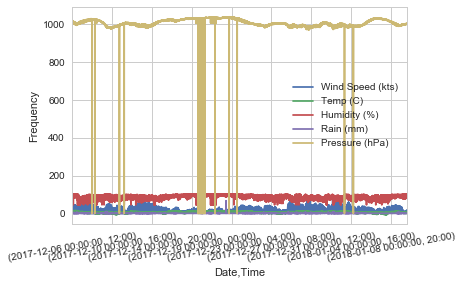

In [54]:
data1.plot(rot=10)
plt.ylabel('Frequency')

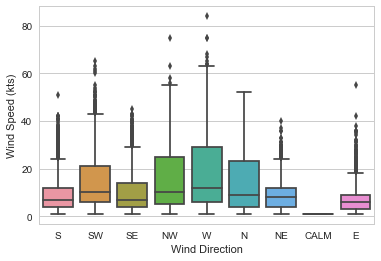

In [55]:
sns.boxplot(x="Wind Direction", y="Wind Speed (kts)", data=data1);

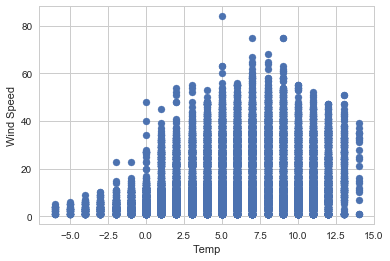

In [56]:
plt.scatter(data1['Temp (C)'],data1['Wind Speed (kts)'])
plt.ylabel('Wind Speed')
plt.xlabel('Temp')
plt.show()

### 4) Binning

### a)Binning for Humidity

In [58]:
data1['Humidity (%)'].describe()

count    20975.000000
mean        87.300548
std          9.406659
min         45.000000
25%         82.000000
50%         89.000000
75%         95.000000
max        100.000000
Name: Humidity (%), dtype: float64

In [59]:
bins =[0,50,65,80,100]
category = ['Very Low','Low','High','Very High']
data1['Hum'] = pd.cut(data1['Humidity (%)'],bins, labels=category)
data1.head()

Location Wind Direction  Wind Speed (kts)  \
Date       Time                                                          
2017-12-06 12:00    ATHENRY GALWAY(A)              S                23   
           12:00  BALLYHAISE CAVAN(A)              S                13   
           12:00         BELMULLET(A)              S                35   
           12:00   CASEMENT AERODROME              S                41   
           12:00       CLAREMORRIS(A)              S                26   

                     Weather  Temp (C)  Humidity (%)  Rain (mm)  \
Date       Time                                                   
2017-12-06 12:00        FAIR        12            87        0.0   
           12:00      CLOUDY        11            89        0.0   
           12:00  LIGHT RAIN        12            97        0.4   
           12:00      CLOUDY        11            83        0.0   
           12:00        FAIR        10            97        0.6   

                  Pressure (hPa)        Hum  
Date       Time                              
2017-12-06 12:00            1013  Very High  
           12:00            1013  Very High  
           12:00            1009  Very High  
           12:00            1016  Very High  
           12:00            1012  Very High

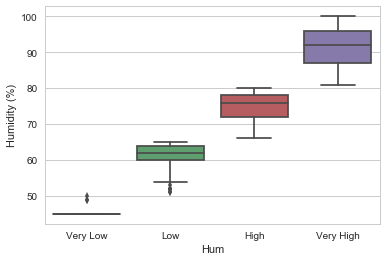

In [60]:
sns.boxplot(x="Hum", y="Humidity (%)", data=data1);

### b)Binning for Rain column

In [61]:
data1['Rain (mm)'].describe()

count    20975.000000
mean         0.190880
std          0.699619
min          0.000000
25%          0.000000
50%          0.000000
75%          0.100000
max         66.600000
Name: Rain (mm), dtype: float64

In [62]:
bins1 =[-0.1,5.0,6.5,7.0,70.0]
category1 = ['Very Low','Low','Moderate','Heavy']
data1['Rain'] = pd.cut(data1['Rain (mm)'],bins1, labels=category1)
data1.head()

Location Wind Direction  Wind Speed (kts)  \
Date       Time                                                          
2017-12-06 12:00    ATHENRY GALWAY(A)              S                23   
           12:00  BALLYHAISE CAVAN(A)              S                13   
           12:00         BELMULLET(A)              S                35   
           12:00   CASEMENT AERODROME              S                41   
           12:00       CLAREMORRIS(A)              S                26   

                     Weather  Temp (C)  Humidity (%)  Rain (mm)  \
Date       Time                                                   
2017-12-06 12:00        FAIR        12            87        0.0   
           12:00      CLOUDY        11            89        0.0   
           12:00  LIGHT RAIN        12            97        0.4   
           12:00      CLOUDY        11            83        0.0   
           12:00        FAIR        10            97        0.6   

                  Pressure (hPa)        Hum      Rain  
Date       Time                                        
2017-12-06 12:00            1013  Very High  Very Low  
           12:00            1013  Very High  Very Low  
           12:00            1009  Very High  Very Low  
           12:00            1016  Very High  Very Low  
           12:00            1012  Very High  Very Low

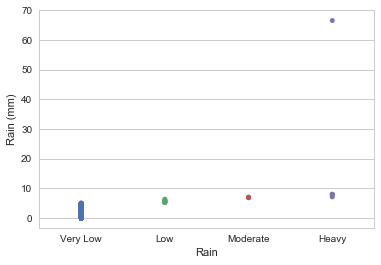

In [79]:
sns.stripplot(x="Rain", y="Rain (mm)", data=data1);

From the above graph we can analyze that the Rainfall was very low(-0.1-5.0) for the most of the days for the given data.

### c) Binning for Temperature column

In [66]:
data1['Temp (C)'].describe()

count    20975.000000
mean         5.697545
std          3.689374
min         -6.000000
25%          3.000000
50%          6.000000
75%          9.000000
max         14.000000
Name: Temp (C), dtype: float64

In [67]:
bins2 =[-7,0,5,10,15]
category2 = ['Extreme cold','Very Cold','Cold','Moderate']
data1['Temp'] = pd.cut(data1['Temp (C)'],bins2, labels=category2)
data1.head()

Location Wind Direction  Wind Speed (kts)  \
Date       Time                                                          
2017-12-06 12:00    ATHENRY GALWAY(A)              S                23   
           12:00  BALLYHAISE CAVAN(A)              S                13   
           12:00         BELMULLET(A)              S                35   
           12:00   CASEMENT AERODROME              S                41   
           12:00       CLAREMORRIS(A)              S                26   

                     Weather  Temp (C)  Humidity (%)  Rain (mm)  \
Date       Time                                                   
2017-12-06 12:00        FAIR        12            87        0.0   
           12:00      CLOUDY        11            89        0.0   
           12:00  LIGHT RAIN        12            97        0.4   
           12:00      CLOUDY        11            83        0.0   
           12:00        FAIR        10            97        0.6   

                  Pressure (hPa)        Hum      Rain      Temp  
Date       Time                                                  
2017-12-06 12:00            1013  Very High  Very Low  Moderate  
           12:00            1013  Very High  Very Low  Moderate  
           12:00            1009  Very High  Very Low  Moderate  
           12:00            1016  Very High  Very Low  Moderate  
           12:00            1012  Very High  Very Low      Cold

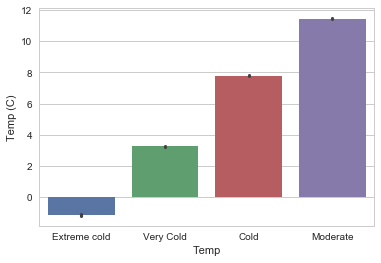

In [68]:
sns.barplot(x="Temp", y="Temp (C)", data=data1);

From the above graph we can analyze that the Rainfall was moderate(11-15) for the most of the days for the given data.

#### 4) Binning Wind speed column

In [69]:
data1['Wind Speed (kts)'].describe()

count    20975.000000
mean        13.308367
std         11.911736
min          1.000000
25%          5.000000
50%          9.000000
75%         20.000000
max         84.000000
Name: Wind Speed (kts), dtype: float64

In [70]:
bins3 =[0,20,40,60,80]
category3 = ['Low','Medium','High','Very High']
data1['WindS'] = pd.cut(data1['Wind Speed (kts)'],bins3, labels=category3)
data1.head()

Location Wind Direction  Wind Speed (kts)  \
Date       Time                                                          
2017-12-06 12:00    ATHENRY GALWAY(A)              S                23   
           12:00  BALLYHAISE CAVAN(A)              S                13   
           12:00         BELMULLET(A)              S                35   
           12:00   CASEMENT AERODROME              S                41   
           12:00       CLAREMORRIS(A)              S                26   

                     Weather  Temp (C)  Humidity (%)  Rain (mm)  \
Date       Time                                                   
2017-12-06 12:00        FAIR        12            87        0.0   
           12:00      CLOUDY        11            89        0.0   
           12:00  LIGHT RAIN        12            97        0.4   
           12:00      CLOUDY        11            83        0.0   
           12:00        FAIR        10            97        0.6   

                  Pressure (hPa)        Hum      Rain      Temp   WindS  
Date       Time                                                          
2017-12-06 12:00            1013  Very High  Very Low  Moderate  Medium  
           12:00            1013  Very High  Very Low  Moderate     Low  
           12:00            1009  Very High  Very Low  Moderate  Medium  
           12:00            1016  Very High  Very Low  Moderate    High  
           12:00            1012  Very High  Very Low      Cold  Medium

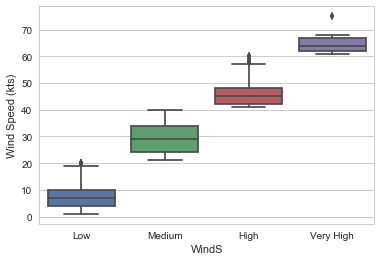

In [71]:
sns.boxplot(x="WindS", y="Wind Speed (kts)", data=data1);

### 5) Graphs for flask webapp

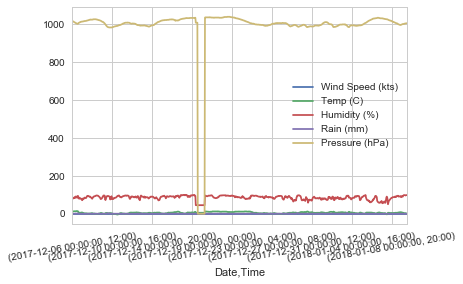

In [73]:
data1[data1['Location']=='PHOENIX PARK(A)'].plot(rot=10)

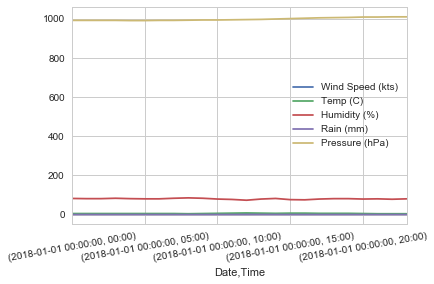

In [74]:
data1[data1['Location']=='PHOENIX PARK(A)'].loc['2018-01-01'].plot(rot=10)


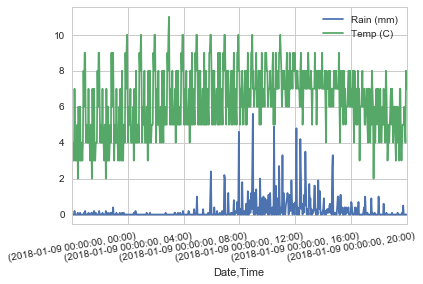

In [75]:
data1[['Rain (mm)','Temp (C)']].loc['2018-01-09'].plot(rot=10)


In [ ]:
4)Particular date

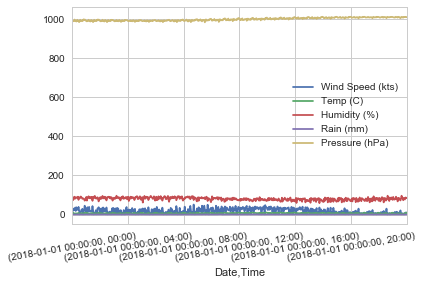

In [76]:
data1.loc['2018-01-01'].plot(rot=10);